In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt



In [6]:
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

X_HotEncoded_NumOfFeatures = len(list(X_HotEncoded.columns))

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
X_LabelEncoded_NumOfFeatures = len(list(X.columns))
print(X.columns)
print(X.shape)



print(X_HotEncoded.columns)
print(X_HotEncoded.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupatio

In [8]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
dfMadelon_X_NumOfFeatures = len(list(dfMadelon_X.columns))
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfMadelon_X_scaled=scaler.fit_transform(dfMadelon_X)

print(dfMadelon_X_scaled.shape)


(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)
(2000, 500)


In [9]:
def ApplyPCA(data,itemlen=0):
    numFeature=0
    if(type(data).__name__ == 'DataFrame'):
        numFeature = len(list(data.columns))
    else:
        numFeature = itemlen
    model = PCA(numFeature)
        
    data_new = model.fit_transform(data)
        
        
    plt.title("PCA determining number of component",fontsize=16)
    plt.plot(np.cumsum(model.explained_variance_ratio_))   
    plt.xlabel("Number of Components",fontsize=10)
    plt.ylabel("Cumulative explained Variance Ratio",fontsize=10)    
    plt.show()
        

In [10]:
def ExtractFromPCA(data,rangVal=50):    
    reconErrorAvg =[]
    reconErrorStdDev =[]
    meanerr =0
    timeCompute =[]
    for i in range(1, rangVal):
        start_time = time.time()
        model = PCA(n_components=i)        
        data_new = model.fit_transform(data)
        timeCompute.append((time.time()-start_time) *1000)
        df = pd.DataFrame(data_new)       
        df_inv=model.inverse_transform(data_new)
        if(type(data).__name__ == 'DataFrame'):
            meanerr = (df_inv-data).apply(np.absolute).mean().mean()
        else:
            meanerr = np.absolute((df_inv-data)).mean().mean()
        reconErrorAvg.append(meanerr)
        
    plt.plot(range(1, rangVal), reconErrorAvg, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Avg Reconstruction Error')
    plt.show()
    plt.plot(range(1, rangVal), timeCompute, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Time (in milliseconds)')
    plt.show()
    print(reconErrorAvg)

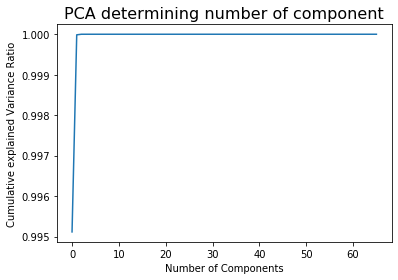

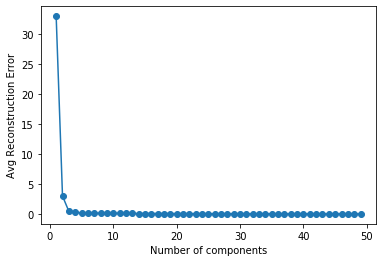

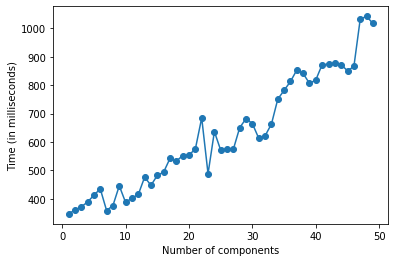

[32.92623741746644, 2.977217791333007, 0.44048105351705413, 0.30806146166657383, 0.1543877521213, 0.1258620529574234, 0.1094027774337559, 0.10091738385923778, 0.09646654903745798, 0.09135754664738857, 0.08783005274635101, 0.08296562780993469, 0.07757464469968416, 0.07127318307282623, 0.06925490175094898, 0.06723777577766539, 0.06558033801401501, 0.06195220239871309, 0.05907543130720581, 0.055565918896884996, 0.051022541228315996, 0.046851960882784614, 0.04471550162838648, 0.04212400327060615, 0.039012339984646593, 0.03784553048650597, 0.03540481173753074, 0.033661851232833176, 0.03221962634900576, 0.029605309215109787, 0.02633801877909676, 0.025836860366998095, 0.02420827148999158, 0.022324457328926673, 0.02039579898768716, 0.018989014738159754, 0.017159298553655257, 0.015730256880567433, 0.01334316704427673, 0.011634638844076473, 0.009442468559050184, 0.0075977939696699965, 0.006839544625750523, 0.006457214829055489, 0.005459398396583619, 0.00494113376867613, 0.003938756028194124, 0.0

In [11]:
#Adult hot encoded
np.random.seed =10
ApplyPCA(X_HotEncoded)
ExtractFromPCA(X_HotEncoded)

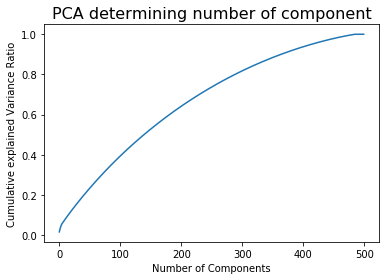

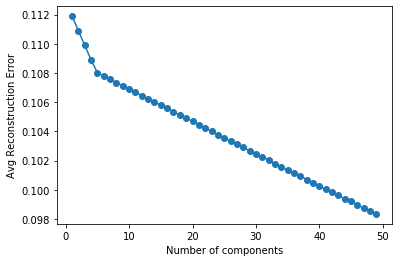

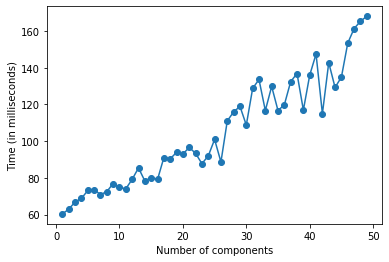

[0.11188476329874024, 0.1109013279856211, 0.10988552126491445, 0.10890194751088202, 0.10802115942997219, 0.10778818827582891, 0.10756534270560827, 0.10732835797616466, 0.10712468101490624, 0.10688619670405755, 0.10668125480958371, 0.1064457949758718, 0.10624398033628014, 0.10601843658568681, 0.1057952568803614, 0.10557331106951656, 0.10534446840174258, 0.10512126748747634, 0.10489489522683997, 0.10470427986423561, 0.1044458512932385, 0.10421038775784856, 0.10401350618206318, 0.10378088463054763, 0.10357076837665757, 0.103342026771105, 0.10311907056064606, 0.10290763199921009, 0.10266864413528885, 0.10245849559904259, 0.10222884259343801, 0.10206323521535729, 0.10179196467949671, 0.10155260968135608, 0.10137014154192009, 0.10113065093979536, 0.10094950823989544, 0.10070247850332649, 0.10049052307481315, 0.10024948680676246, 0.10002252766893438, 0.09982562743514582, 0.09961012629610798, 0.09937081950130723, 0.09924476711586445, 0.09897725519516497, 0.09874394930509373, 0.0985233184267475

In [12]:
#Madelon scaled
#type(dfMadelon_X_scaled).__name__
#print(dfMadelon_X_scaled)
ApplyPCA(dfMadelon_X_scaled,len(list(dfMadelon_X.columns)))
ExtractFromPCA(dfMadelon_X_scaled)